In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [26]:
df = pd.read_csv("C:/Fares Data/University/Samsung X LifeMakers Internship/Titanic Dataset Cleaning/titanic.csv")

# **Aplying EDA**

In [27]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


C:\Users\fares\AppData\Local\Temp\ipykernel_12056\263038468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


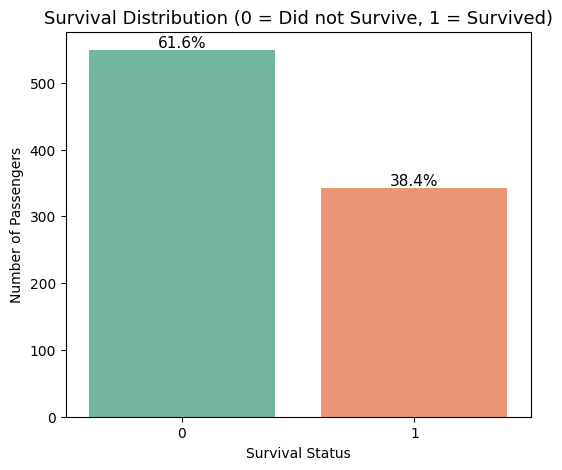

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(x='Survived', data=df, palette='Set2')

plt.title("Survival Distribution (0 = Did not Survive, 1 = Survived)", fontsize=13)
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")

total = len(df)
for p in plt.gca().patches:
    percentage = 100 * p.get_height() / total
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(),
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11)

plt.show()

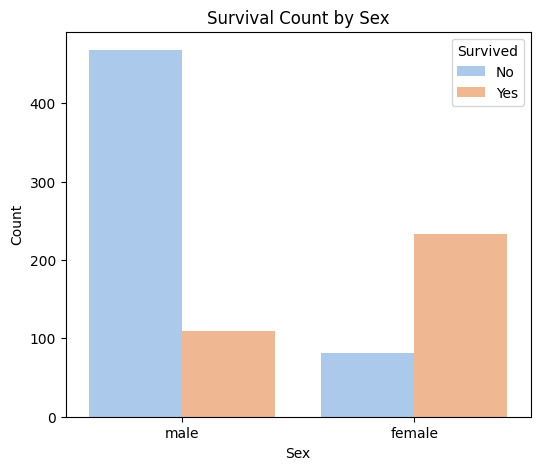

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')

plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

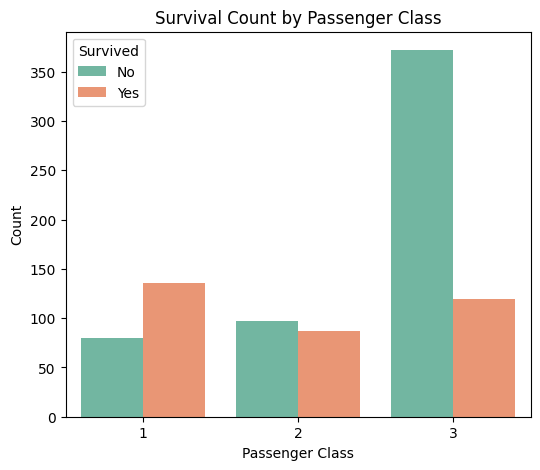

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')

plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


C:\Users\fares\AppData\Local\Temp\ipykernel_12056\3859800245.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==1]['Age'], shade=True, label="Survived", color='green')
C:\Users\fares\AppData\Local\Temp\ipykernel_12056\3859800245.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==0]['Age'], shade=True, label="Not Survived", color='red')


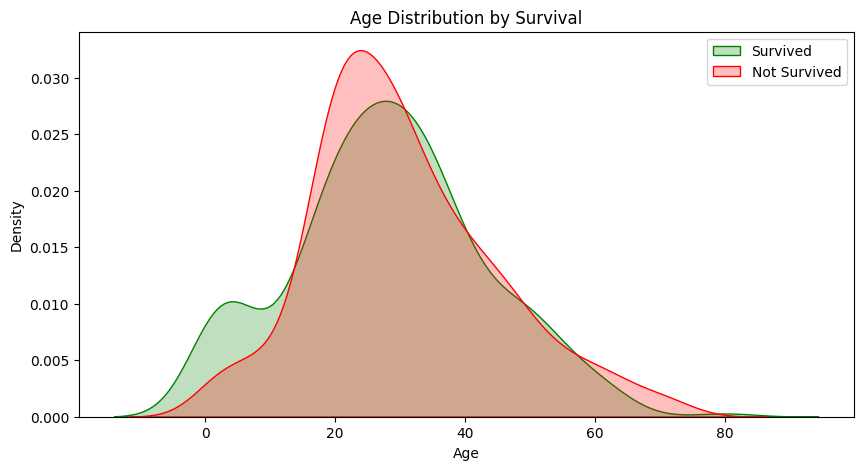

In [32]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df[df['Survived']==1]['Age'], shade=True, label="Survived", color='green')
sns.kdeplot(data=df[df['Survived']==0]['Age'], shade=True, label="Not Survived", color='red')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

C:\Users\fares\AppData\Local\Temp\ipykernel_12056\1788263408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set3')


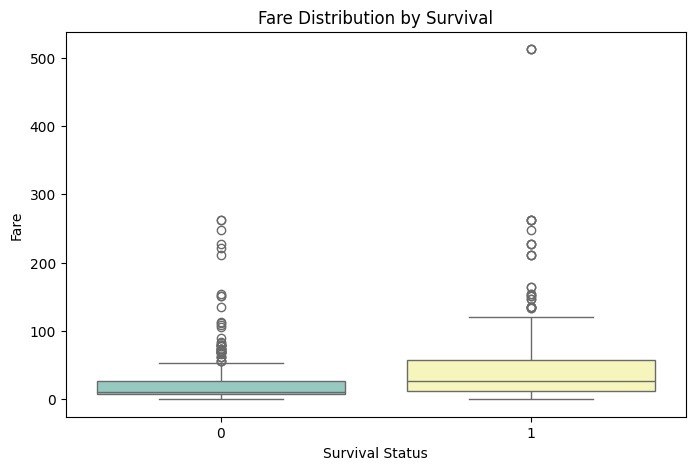

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title("Fare Distribution by Survival")
plt.xlabel("Survival Status")
plt.ylabel("Fare")
plt.show()


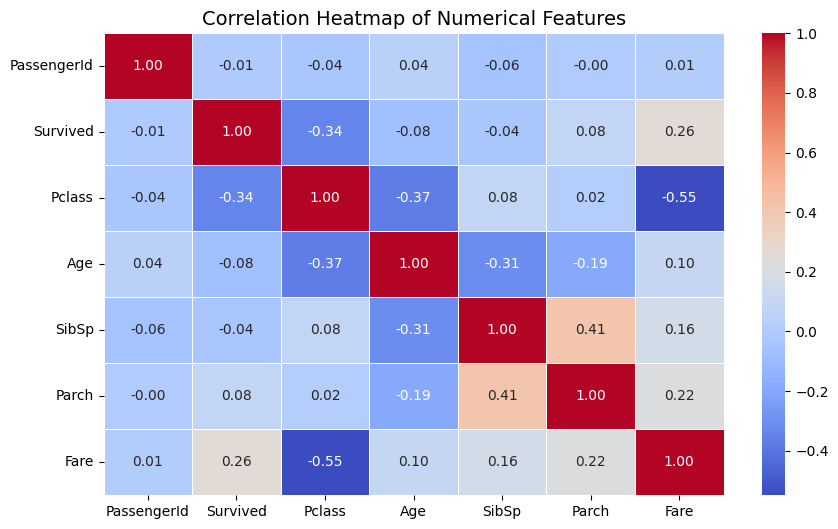

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap="coolwarm", 
            linewidths=0.5, 
            fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

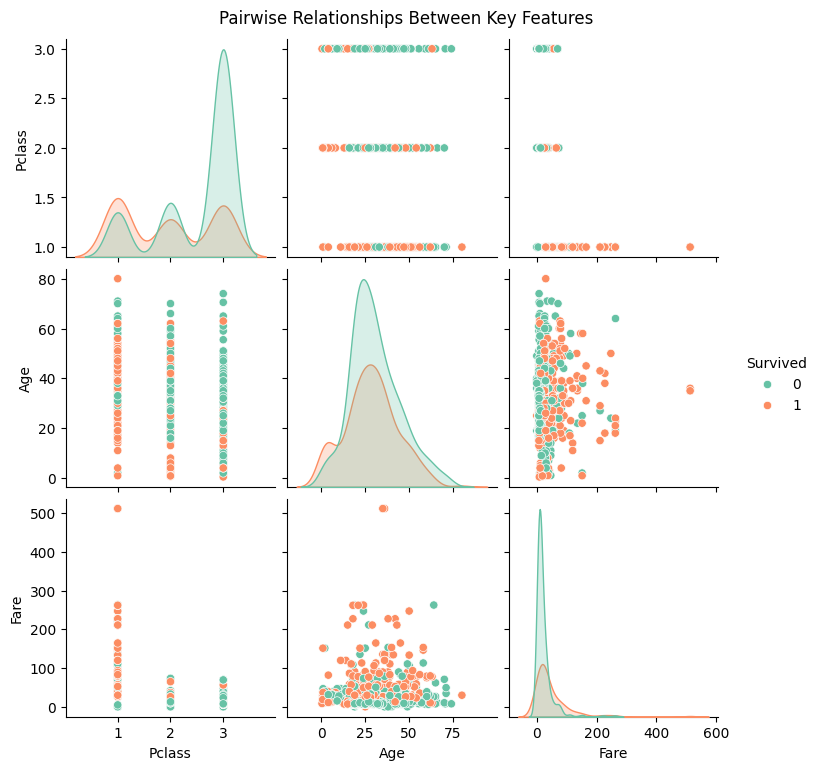

In [35]:
selected_features = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(df[selected_features], hue='Survived', palette='Set2')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()

# **Preprocessing**

## Cleaning

In [36]:
df.drop(['Name', 'Cabin', 'Fare', 'Ticket', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [37]:
df['Age'] = df['Age'].fillna(df.Age.mean())
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [38]:
df['Child'] = df['Age'] < 18
df['Teen'] = (df['Age'] >= 18) & (df['Age'] < 25)
df['Adult'] = (df['Age'] >= 25) & (df['Age'] < 60)
df['Senior'] = df['Age'] >= 60
df.drop(['Age'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Child,Teen,Adult,Senior
0,1,0,3,male,1,0,False,True,False,False
1,2,1,1,female,1,0,False,False,True,False
2,3,1,3,female,0,0,False,False,True,False
3,4,1,1,female,1,0,False,False,True,False
4,5,0,3,male,0,0,False,False,True,False


In [39]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Child,Teen,Adult,Senior
0,1,0,3,1,1,0,False,True,False,False
1,2,1,1,0,1,0,False,False,True,False
2,3,1,3,0,0,0,False,False,True,False
3,4,1,1,0,1,0,False,False,True,False
4,5,0,3,1,0,0,False,False,True,False


## Feature Engineering 

In [40]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Child,Teen,Adult,Senior,FamilySize
0,1,0,3,1,False,True,False,False,2
1,2,1,1,0,False,False,True,False,2
2,3,1,3,0,False,False,True,False,1
3,4,1,1,0,False,False,True,False,2
4,5,0,3,1,False,False,True,False,1


## Handling Class Imbalance

In [43]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [47]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new balance
print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_resampled.value_counts(normalize=True))


Before SMOTE: Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
After SMOTE: Survived
1    0.5
0    0.5
Name: proportion, dtype: float64


C:\Users\fares\AppData\Local\Temp\ipykernel_12056\3408854796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df_balanced, palette='Set2')


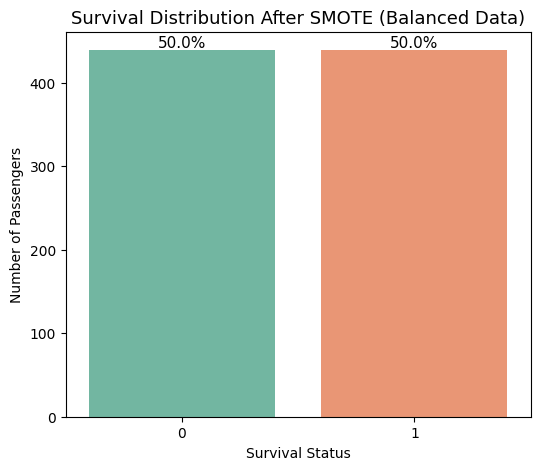

In [49]:
df_balanced = pd.DataFrame(y_train_resampled, columns=['Survived'])

plt.figure(figsize=(6,5))
sns.countplot(x='Survived', data=df_balanced, palette='Set2')

plt.title("Survival Distribution After SMOTE (Balanced Data)", fontsize=13)
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")

total = len(df_balanced)
for p in plt.gca().patches:
    percentage = 100 * p.get_height() / total
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(),
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11)

plt.show()

# **Modeling**

🔹 Logistic Regression Results:
Accuracy: 0.776536312849162
Recall: 0.7101449275362319

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



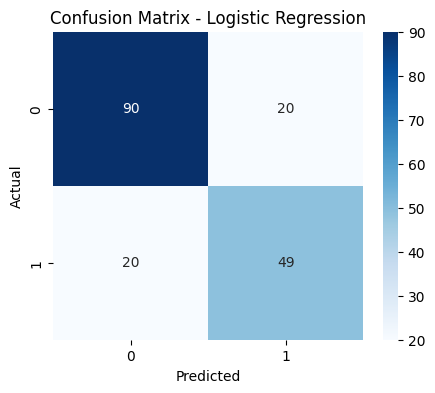

In [ ]:
model_results = {}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_lr = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

model_results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Recall': recall_lr
}

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔹 Random Forest Results:
Accuracy: 0.7206703910614525
Recall: 0.6811594202898551

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       110
           1       0.63      0.68      0.65        69

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.73      0.72      0.72       179



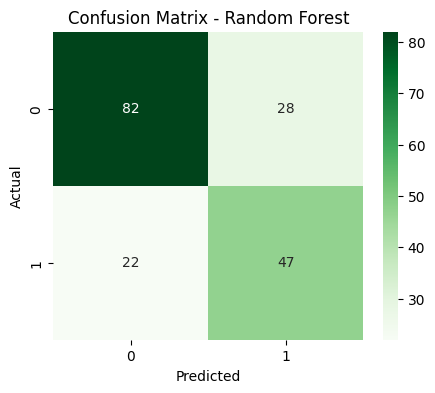

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("🔹 Random Forest Results:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

model_results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Recall': recall_rf
}

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

🔹 KNN Results:
Accuracy: 0.7988826815642458
Recall: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



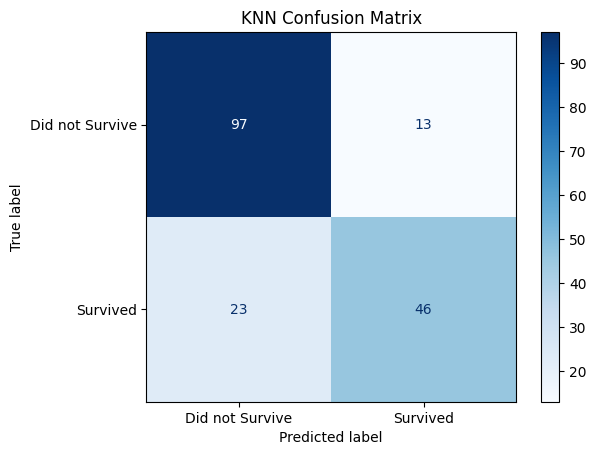

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("🔹 KNN Results:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not Survive", "Survived"])
disp.plot(cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

🔹 SVM Results (Scaled):
Accuracy: 0.8044692737430168
Recall: 0.6956521739130435

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



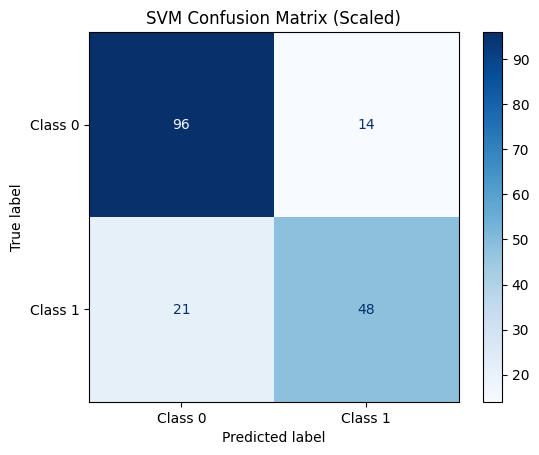

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)

print("🔹 SVM Results (Scaled):")
print(f"Accuracy: {svm_accuracy}")
print(f"Recall: {svm_recall}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("SVM Confusion Matrix (Scaled)")
plt.show()

model_results['SVM'] = {'Accuracy': svm_accuracy, 'Recall': svm_recall}


# **Models Comparison**

📋 Model Comparison Table:
                     Accuracy    Recall
SVM                  0.804469  0.695652
KNN                  0.798883  0.666667
Logistic Regression  0.776536  0.710145
Random Forest        0.720670  0.681159


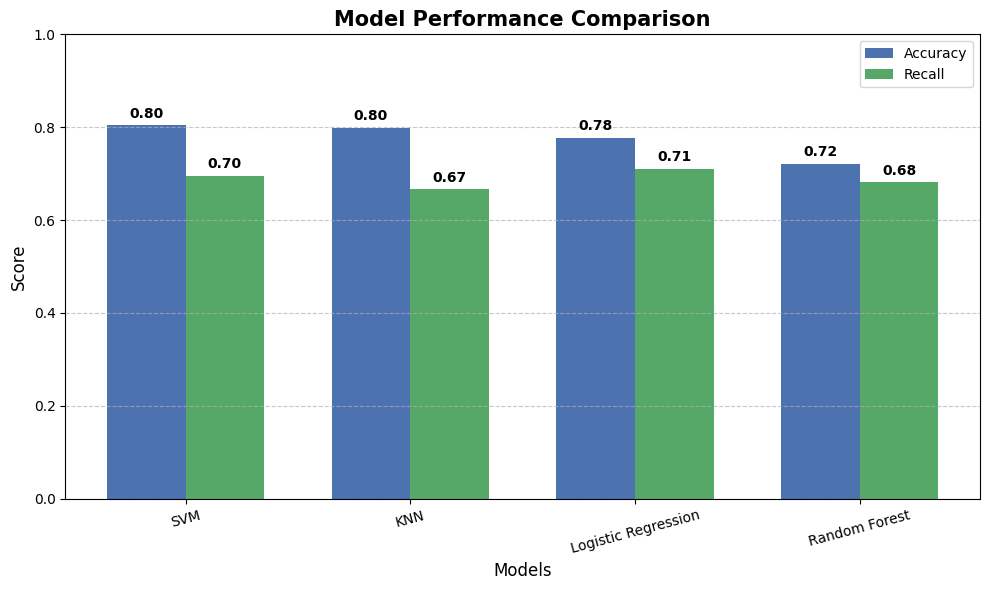

In [ ]:
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("📋 Model Comparison Table:")
print(results_df)

models = results_df.index
accuracy = results_df["Accuracy"].values
recall = results_df["Recall"].values
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy', color='#4C72B0')
bars2 = plt.bar(x + width/2, recall, width, label='Recall', color='#55A868')

plt.title('Model Performance Comparison', fontsize=15, weight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
